# Project 18 - Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year. There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

In this project, we are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. Our [dataset can be found here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

## The Dataset

In [1]:
import pandas as pd
data = pd.read_csv('heart_disease_prediction.csv')

In [2]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


From the table above we can see that our data has the following columns:
- `Age` - age of the patient in years
- `Sex` - sex of the patient (M: Male, F: Female)
- `ChestPainType` - (TA: Typical Angina, ATA: Atypical angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- `RestingBP` - resting blood pressure (mm Hg)
- `Cholesterol` - serum cholesterol (mm/dl)
- `FastingBS` - fasting blood sugar (1: if FastingBS > 120mg/dl, 0: otherwise)
- `RestingECG` - resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- `MaxHR` - maximum heart rate achieved (numeric value between 60 and 202)
- `ExerciseAngina` - exercise-induced angina
- `Oldpeak` - oldpeak = ST (numeric value measured in depression)
- `ST_Slope` - the slope of the peak exercise ST segment (upsloping, flat, downsloping)
- `HeartDisease` - output class (1: heart disease, 0: normal)

In [3]:
data.shape

(918, 12)

Our data has 12 columns and 918 rows, meaning that there are 11 possible features for machine learning (all columns except `HeartDisease`) and 918 observations.

## EDA: Descriptive Statistics

In [4]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

We have both numerical and categorical values. Even though categories `HeartDisease` and `FastingBS` are integers, they are categorical values, because they only take values 0 or 1. Let's explore some of the columns.

### Age

In [5]:
data['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

The average age of a patient is between 53 and 54 years. The lowest age is 28 years old, and the highest is 77 years old.

### Null values

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no null values in our dataset at all.

### Cholesterol

In [7]:
data['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

### Summary of all columns

In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Above is the summary statistics for all of the columns in our dataset. Let's make a boxplot to see some outliers easier.

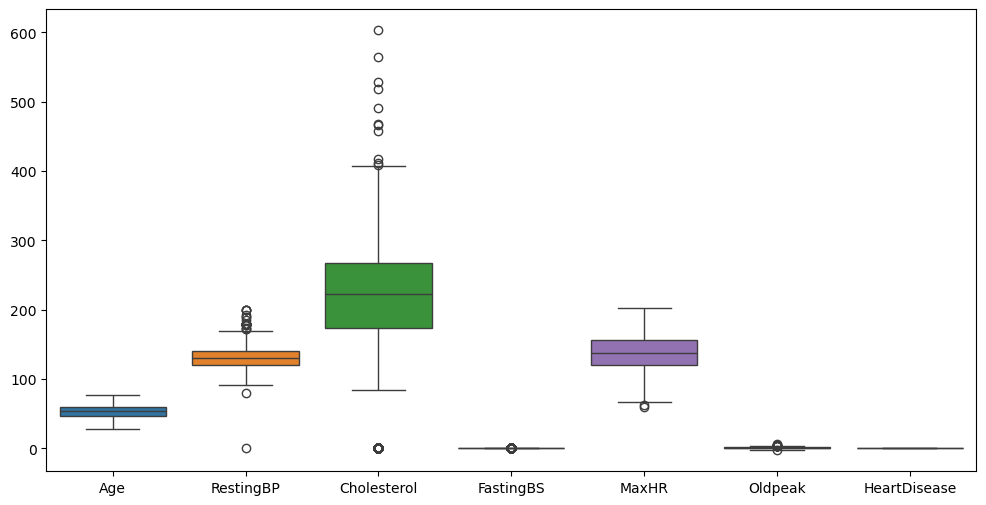

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.show()

From the box plot above we can see that columns `RestingBP` and `Cholesterol` have multiple outliers. We can also see that there is one patient with `RestingBP` value of 0, and multiple with `Cholesterol` value of 0, which shouldn't be possible.

## EDA: Categorical columns 

Let's now explore categorical columns (Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope and HeartDisease). We will create bar charts that displays the number of rows for each category of that column.

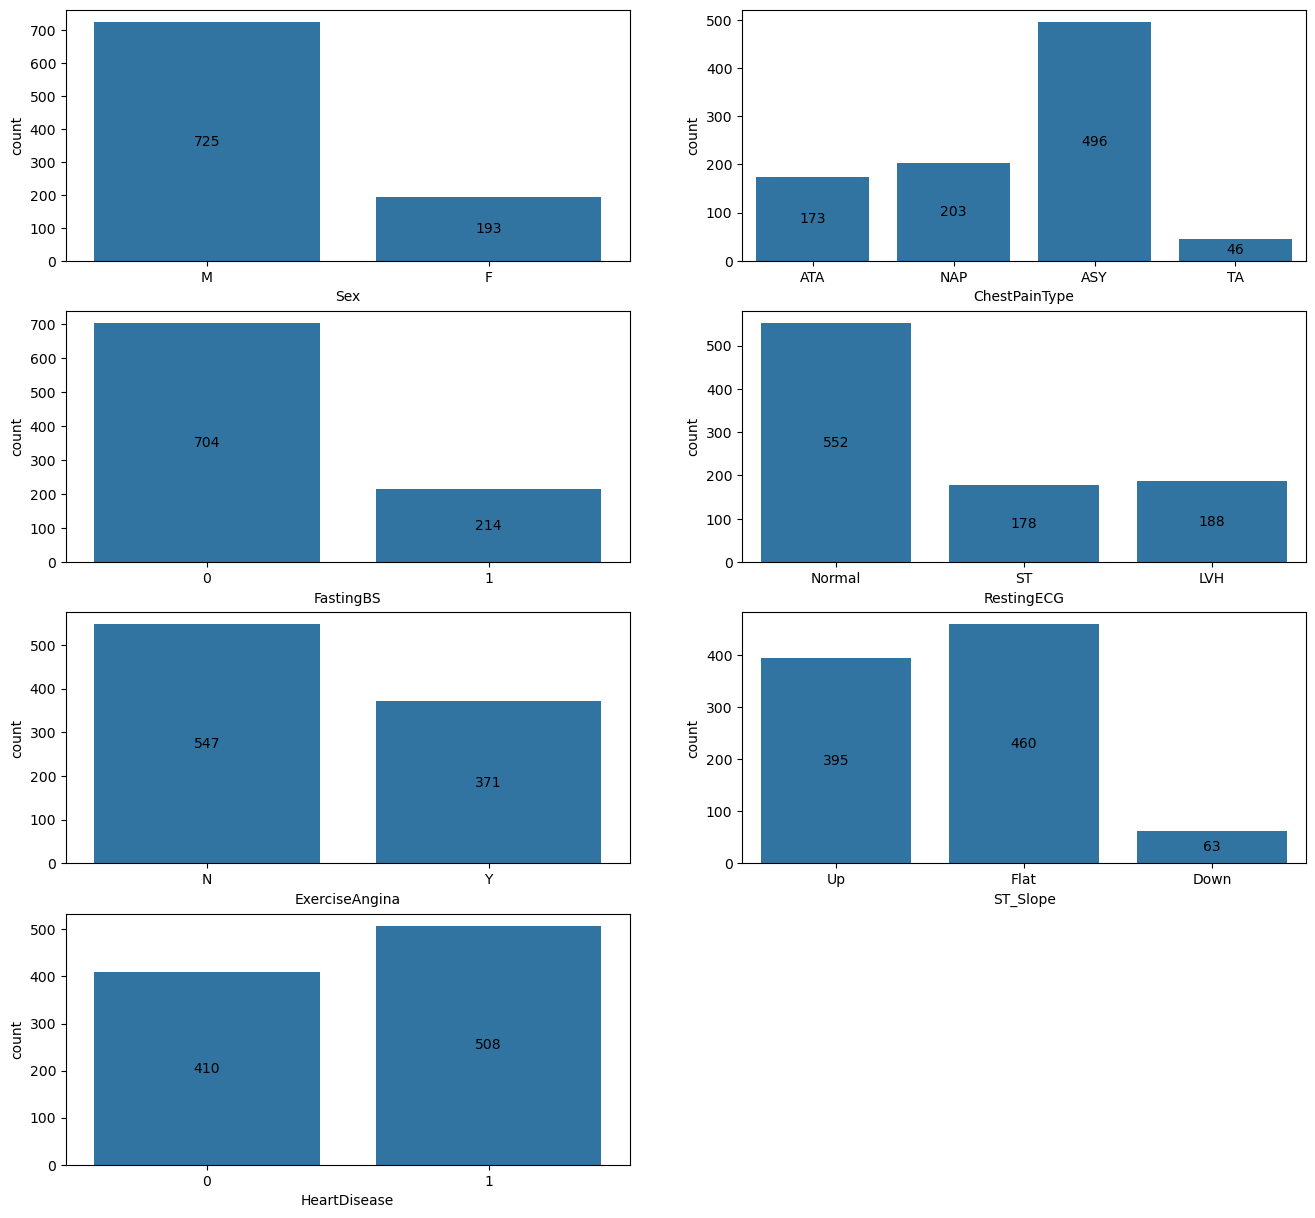

In [10]:
categorical = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

fig = plt.figure(figsize=(16,15))

for index, col in enumerate(categorical):
    ax = plt.subplot(4, 2, index+1)
    sns.countplot(x=data[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

From the charts above we can see for example that:
- There are 725 Males and only 193 Females.
- ASY (Asymptomatic) is clearly the most common type of chestpain (meaning that there is no pain).
- Fasting blood sugar is less than 120mg/dl for 704 patients, more than 120mg/dl for 214 patients.

Let's also make a bar chart that displays the number of rows for each category of that column, grouped by `HeartDisease`.

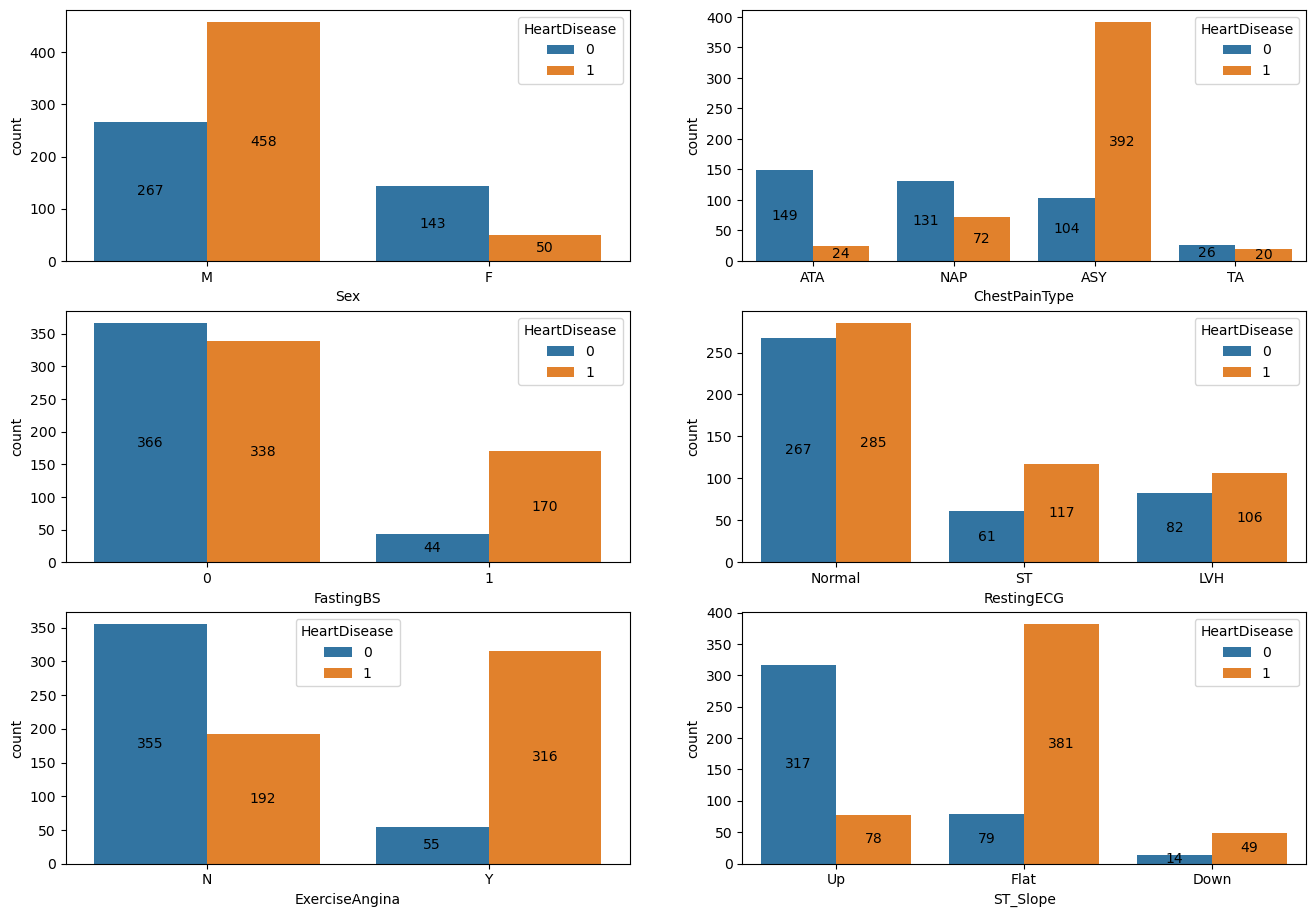

In [11]:
fig = plt.figure(figsize=(16,15))

#without heartdisease
for index, col in enumerate(categorical[:-1]):
    ax = plt.subplot(4, 2, index+1)
    # group by heartdisease
    sns.countplot(x=data[col], hue=data["HeartDisease"], ax=ax) 
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

Above we can see values grouped by heart disease. For example out of 705 males 458 had a heart disease, meaning that 65% of male patients had a heart disease. For female the number is only 50 out of 193 females, meaning 26%. Asymptomatic chest pain has a very high number of heart diseases (meaning that there was no chest pain symptoms). Fasting blood sugar over 120mg/dl also seems like one risk factor for heart diseases. Patients with exercise angina also have very high bar for heart disease, same with those that have flat ST slope.

## Data cleaning

As we noticed earlier, there are no missing values in our dataset, but there are some 0-values where it shouldn't be possible. Let's fix those.

In [12]:
print(data[data['RestingBP']==0].shape)
print(data[data['Cholesterol']==0].shape)

(1, 12)
(172, 12)


There is only one patient with a `RestingBP` value of 0, but 172 patients with `Cholesterol` value of 0. We can remove the one patient with `RestingBP` of 0, because that won't affect our model. We can't delete 172 patients, because that would be close to 20% of our dataset. Because of that, we are going to assign mean cholesterole for all the patients with 0 cholesterole.

In [13]:
#removing 0 restingbp
data = data[data['RestingBP'] != 0]
#should be 917
data.shape

(917, 12)

In [14]:
mean_cholesterol = data['Cholesterol'].mean()
data['Cholesterol'] = data['Cholesterol'].apply(
    lambda x: mean_cholesterol if x == 0 else None
)
print(data.shape)
print(data[data['Cholesterol'] == 0])

(917, 12)
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


Above we removed the row with `RestingBP` of 0. Then we changed all the 0 cholesterol values with mean values, and when we filtered the data with `Cholesterol` == 0, we got and empty dataframe, meaning that there are no patients with 0 cholesterol, so now our data is cleaned.

## Feature Selection

After cleaning our data, we can select features for our model. Let's start by converting all the categorical values (not the heart disease one) to dummy variables.

In [15]:
#categorical contains heartdisease as last value (defined above)
data = pd.get_dummies(data=data, columns=categorical[:-1], drop_first=True)
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,NaN,172,0.0,0,True,True,False,False,False,True,False,False,False,True
1,49,160,NaN,156,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,130,NaN,98,0.0,0,True,True,False,False,False,False,True,False,False,True
3,48,138,NaN,108,1.5,1,False,False,False,False,False,True,False,True,True,False
4,54,150,NaN,122,0.0,0,True,False,True,False,False,True,False,False,False,True


We will now create a Pearson's correlation heat map. Pearson's correlation only shows linear correlation, so it is not optimal way to find out best features, but it's an ok start.

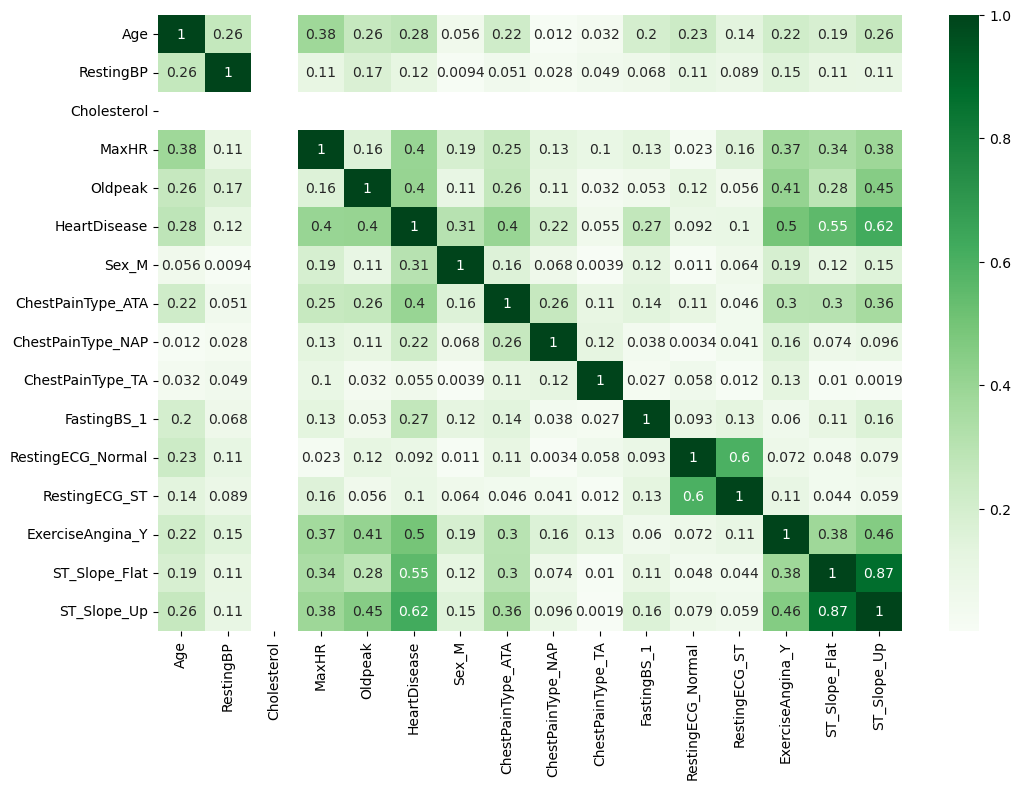

In [16]:
correlations = abs(data.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="Greens")
plt.show()

From the heatmap above it's hard to see really anything, so let's show only those values with correlation over 0.3.

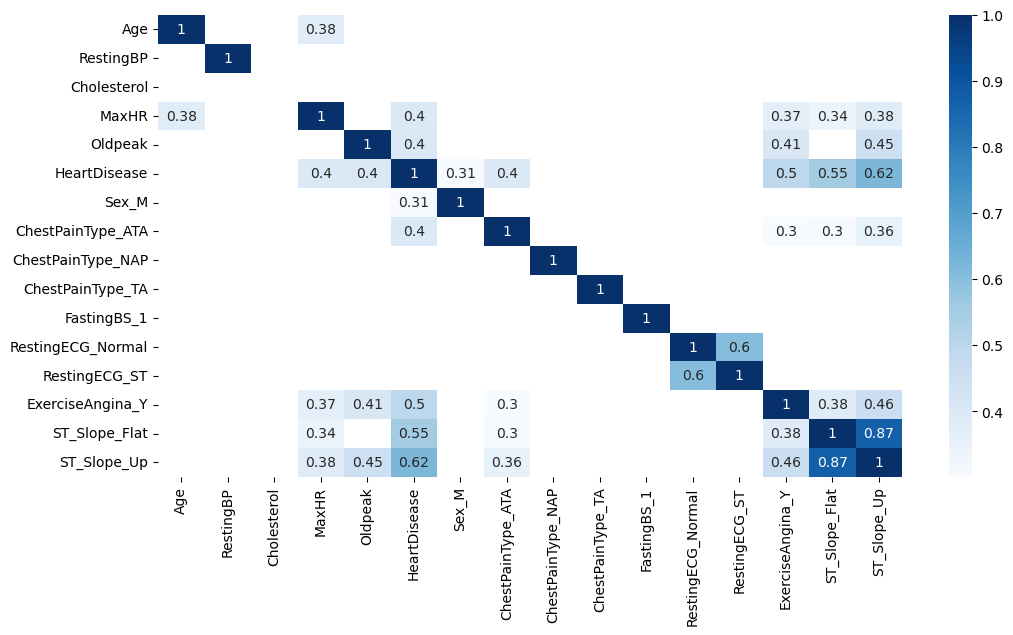

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(correlations[correlations > 0.3], annot=True, cmap='Blues')
plt.show()

From the heatmap above we can see that `HeartDisease` has correlation with `ST_Slope_Up`, `ST_Slope_Flat`, `ExerciseAngina_Y`, `ChestPainType_ATA`, `Sex_M`, `Oldpeak` and `MaxHR`.

## Building a Classifier

Next we are going to create and train multiple models using one of those features mentioned above at a time.

In [18]:
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

#splitting to train and validation sets
from sklearn.model_selection import train_test_split
#80% train 20% val
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=417) #random state to replicate
print(X_train.shape[0])
print(X_val.shape[0])

733
184


We now have a training set with 733 observations and a validation set with 184 observations.

In [19]:
feature_columns = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'ChestPainType_ATA', 'Sex_M', 'Oldpeak', 'MaxHR']

from sklearn.neighbors import KNeighborsClassifier
for feature in feature_columns:
    # 3 neighbors at first, we can try others later
    knn = KNeighborsClassifier(3)
    fit_model = knn.fit(X_train[[feature]], y_train)
    accuracy = fit_model.score(X_val[[feature]], y_val)
    print(f"With only feature '{feature}' the model is {accuracy} accurate.")

With only feature 'ST_Slope_Up' the model is 0.8097826086956522 accurate.
With only feature 'ST_Slope_Flat' the model is 0.782608695652174 accurate.
With only feature 'ExerciseAngina_Y' the model is 0.7119565217391305 accurate.
With only feature 'ChestPainType_ATA' the model is 0.7065217391304348 accurate.
With only feature 'Sex_M' the model is 0.5597826086956522 accurate.
With only feature 'Oldpeak' the model is 0.6956521739130435 accurate.
With only feature 'MaxHR' the model is 0.6141304347826086 accurate.


Above we used K Nearest Neighbors algorithm to see how each of our selected features performs. Out of all the models, the one with `ST_Slope_Up` performed the best (81% accuracy), while the model with `Sex_M` performed the worst (56% accuracy). Let's now create a model that has multiple features together, but before that we need to normalize our features. Normalizing means that we will transform all the values to range (0,1).

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit and transform training set
X_train_scaled = scaler.fit_transform(X_train[feature_columns])
#transform features in the validation set
X_val_scaled = scaler.transform(X_val[feature_columns])

#knn model with all the features
new_model = knn.fit(X_train_scaled, y_train)
new_accuracy = new_model.score(X_val_scaled, y_val)
print(f'The accuracy with multiple features is {new_accuracy}% accurate.')

The accuracy with multiple features is 0.8260869565217391% accurate.


Above we see that our model improved a little bit with multiple features, it is now 82.6% accurate, which is pretty good, but can still most likely be improved with hyperparameter tuning.

## Hyperparameter Tuning

To experiment with the parameters and hyperparameters, we are going to use `GridSearchCV` to search better values. `GridSearchCV` allows us to search over all the parameters for our classifier, for example with knn we can choose to experiment with the `n_neighbors`, `weights`, `metric` and so on, without manually inserting multiple different values.

In [21]:
from sklearn.model_selection import GridSearchCV
#let's split again
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 417)
#scale
X_train_scaled = scaler.fit_transform(X_train[feature_columns])

parameter_dict = {'n_neighbors': range(1,25),
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid=parameter_dict, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.8443574690150033
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}


Above we used `GridSearchCV` to search better values for our parameters. With our given range of parameters, we found out that the best model is 84.4% accurate, with 20 neighbors, uniform weights and auto algorithm. Our model was improved again, we went from 82.6% accuracy to 84.4% accuracy. We will now evaluate this model on our test set.

## Model Evaluation on Test Set

First, we will need to normalize our test set and use the same scaler we created earlier. With test set we will only transform the test set and not fit the scaler on it. The test set is not fit to prevent data leakage, which would result in overly optimistic performance estimates. Using the same scaler fit on the training data ensures realistic evaluation by mimicking real-world conditions where only new, unseen data is transformed.

In [22]:
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.transform(X_val[feature_columns])
#best estimate
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8532608695652174


Our model was 85.3% accurate on the test data. This means that our model is very good at predicting if a patient has a risk for a heart disease. The accuracy with the test data is higher than during training, which raises some flags.

### Some things to consider

In [23]:
print(X.Sex_M.value_counts())
print(X_train.Sex_M.value_counts())
print(X_test.Sex_M.value_counts())

Sex_M
True     724
False    193
Name: count, dtype: int64
Sex_M
True     580
False    153
Name: count, dtype: int64
Sex_M
True     144
False     40
Name: count, dtype: int64


Our data is mostly males, and if we check the distributions we can see that there could a bias because of this imbalance in our dataset. If our test data contained mostly females, the accuracy could be a lot worse, since it is mainly trained with males. In this project we used K Nearest Neighbors model, but there could be other models that perform better.

We had multiple patients with 0 cholesterole, which we then assigned to mean value. If these cholesteroles were supposed to be very high or very low, that could provide different results.

## Summary

Our final model was 85.3% accurate, and it used the following features:
- `ST_Slope_Up`
- `ST_Slope_Flat`
- `ExerciseAngina_Y`
- `ChestPainType_ATA`
- `Sex_M`
- `Oldpeak`
- `MaxHR`

Our data has some limitations, and we only used K Nearest Neighbors in this project. We could try to improve our model with different algorithms, expanding the grid search parameters and trying out different features.